In [1]:
# set up
import pandas as pd
import numpy as np
import pickle
import time 
import os
import matplotlib.pyplot as plt
from datetime import datetime
from operator import itemgetter
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
data_folder_path = 'C:\\Users\\goodluck\\Desktop\\DB'
raw_data_path =  "C:\\Users\\goodluck\\Desktop\\DB\\raw_data"
storage_path =  "C:\\Users\\goodluck\\Desktop\\DB\\database_storage"
DTBS_path = os.path.join(storage_path, "DTBS.pkl")

# re-open
with open(DTBS_path, 'rb') as f:  
    DTBS = pickle.load(f)

In [54]:
# helper

def select_industry(DTBS, iid):
    TS = dict()

    for one_iid in iid:
        count = 0
        for code in list(DTBS['A'].keys()):
            if DTBS['B'][code]['cat1'] == one_iid:
                TS[code] = DTBS['A'][code]
                count += 1
        print(one_iid, count)
    
    return TS

def takeSecond(elem):
    return elem[1]


def retrieve_low_nodes(TS, codes, days, index, sel_num):
    dl_rank = []
    for code in codes:
        dl_rank.append((code, TS[code][days[index]]['dl']))
        
        dl_rank.sort(key=takeSecond)    
    low = dl_rank[0:sel_num]
    return [j[0] for j in low]

def win_rt(res):
    print("For each transaction:")
    print("Max profit", max(res))
    print("Max loss", min(res))
    wins = []
    win = 0
    for i in res:
        if i >= 0:
            win += 1
            wins.append(True)
        else:
            wins.append(False)
        
    win_rate = win/len(res)
    print("Rate of wins", win_rate)
    print("Info for each transaction", wins)
    
def select_existing(PTS, dt):
    exist = []
    for code in list(PTS.keys()):
        if not np.isnan(PTS[code][dt]['dp']):
            exist.append(code)
    return exist

def select_condition(PTS, codes, dt, name, low, high):
    satisfy = []
    for code in codes:
        if PTS[code][dt][name] <= high:
            if PTS[code][dt][name] >= low:
                satisfy.append(code)
    return satisfy


def sel_dts(DD, st, ed, tp):
    dts = []
    stdt = datetime.strptime(st, '%Y-%m-%d').date()
    eddt = datetime.strptime(ed, '%Y-%m-%d').date()
    for time in DD[tp]:
        dt = datetime.strptime(time, '%Y-%m-%d').date()
        if dt >= stdt:
            if dt <= eddt:
                dts.append(time)
    return dts

def all_profit(DTBS, days, ct, sel_ct, sel_dl, sel_num, sel_cd1, sel_nm1, sel_low1, sel_high1):
    profit = []
    sum_dl = 0
    all_codes = []
    res = []
    if sel_ct == 1:
        TS = select_industry(DTBS, ct)
    else:
        TS = DTBS['A']
    for i in range(len(days)):  
#         if sel_dl == 1:
#             curr_dl_codes = retrieve_low_nodes(TS, days, i, sel_num)
#         else:
#             curr_dl_codes = select_existing(TS, days[i])

#         curr_dl_codes = select_existing(TS, days[i])

        if i+1 == len(days):
            curr_dl_codes = select_existing(TS, days[i])

            if sel_cd1 == 1:
                curr_dl_codes = select_condition(TS, curr_dl_codes, days[i], sel_nm1, sel_low1, sel_high1)
            if sel_dl == 1:
                curr_dl_codes = retrieve_low_nodes(TS, curr_dl_codes, days, i, sel_num)                
            
        else: 
            ctw = select_existing(TS, days[i])
            cnw = select_existing(TS, days[i+1])
            curr_dl_codes = list(set(ctw).intersection(set(cnw)))
            
                
            if sel_cd1 == 1:
                curr_dl_codes = select_condition(TS, curr_dl_codes, days[i], sel_nm1, sel_low1, sel_high1)
            if sel_dl == 1:
                curr_dl_codes = retrieve_low_nodes(TS, curr_dl_codes, days, i, sel_num)
#         print(len(curr_dl_codes))
        all_codes.append(curr_dl_codes)
        if i >= 1:
        
            tw = 0
            lw = 0
            for cd in all_codes[i-1]:
                tw += TS[cd][days[i]]['dp']
        
        
            for cd in all_codes[i-1]:
                lw += TS[cd][days[i-1]]['dp']
        
            re = ((tw - lw)/ lw)
            res.append(re)
            sum_dl += re
        
            profit.append(sum_dl)
    return profit, res
    

def plot_str(days, profit,tick_spacing = 4.5, market = DTBS['C']):
    plt.figure(dpi = 1000)

    fig, ax = plt.subplots(1,1)
    plt.plot(days[1:], profit)
    # ewi
    i_x = [days[1], days[-1]]
#     print(market['zi'][days[-1]], market['zi'][days[0]])

    market_gain = (market['zi'][days[-1]]-market['zi'][days[0]])/(market['zi'][days[0]])
    i_y = [0, market_gain]
    plt.plot(i_x, i_y)

    ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
    plt.ylabel('Increase per year/%')
    plt.show()

    print("Final gain", profit[-1])
    print("Market index", market_gain)

def start(DTBS, days, ct, sel_ct, sel_dl, sel_num, sel_cd1, sel_nm1, sel_low1, sel_high1):
    profit, res = all_profit(DTBS, days, ct, sel_ct, sel_dl, sel_num, sel_cd1, sel_nm1, sel_low1, sel_high1)
    ap.append(profit)
    aw.append(profit)
    plot_str(days, profit)
    win_rt(res)

f2020 = sel_dts(DTBS['D'],'2020-01-01','2020-06-30','mon')
s2020 = sel_dts(DTBS['D'],'2020-07-01','2020-12-31','mon')
f2021 = sel_dts(DTBS['D'],'2021-01-01','2021-06-30','mon')
s2021 = sel_dts(DTBS['D'],'2021-07-01','2021-12-31','mon')
f2022 = sel_dts(DTBS['D'],'2022-01-01','2022-06-30','mon')
s2022 = sel_dts(DTBS['D'],'2022-07-01','2022-12-31','mon')
a2023 = sel_dts(DTBS['D'],'2023-01-01','2023-3-22','mon')
a2020 = sel_dts(DTBS['D'],'2020-01-01','2020-12-31','mon')
a2022 = sel_dts(DTBS['D'],'2022-01-01','2022-12-31','mon')
a2021 = sel_dts(DTBS['D'],'2021-01-01','2021-12-31','mon')



In [51]:
def leap(ori, gap):
    new = []
    for i in range(len(ori)):
        if i % gap == 0:
            new.append(ori[i])
    return new

leap(f2020,1)

['2020-01-06',
 '2020-02-10',
 '2020-03-09',
 '2020-04-13',
 '2020-05-18',
 '2020-06-15']

In [108]:
ap = []
aw = []

<Figure size 6000x4000 with 0 Axes>

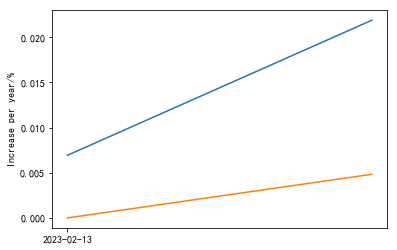

Final gain 0.021885658395440447
Market index 0.004831515304733499
For each transaction:
Max profit 0.014952172573071609
Max loss 0.006933485822368839
Rate of wins 1.0
Info for each transaction [True, True]


In [111]:
start(DTBS, leap(a2023,4), [], 0, 1, 5, 1, 'trt', 2, 10)

In [150]:
def plot_str(days, profit,tick_spacing = 4.5, market = DTBS['C']):
    plt.figure(dpi = 1000)

    fig, ax = plt.subplots(1,1)
    plt.plot(days[1:], profit)
    # ewi
    i_x = [days[1], days[-1]]
#     print(market['zi'][days[-1]], market['zi'][days[0]])

    market_gain = (market['zi'][days[-1]]-market['zi'][days[0]])/(market['zi'][days[0]])
    i_y = [0, market_gain]
    plt.plot(i_x, i_y)

    ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
    plt.ylabel('Increase per year/%')
    plt.show()

    print("Final gain", profit[-1])
    print("Market index", market_gain)

'2023-03-20'

<Figure size 30000x20000 with 0 Axes>

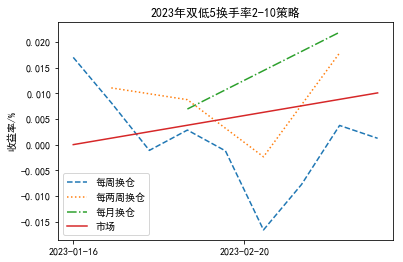

市场收益： 0.010072105706597593
每周换苍收益： 0.0012313815361293195
每两周换仓收益： 0.017849083958917905
每月换仓收益： 0.021885658395440447


In [113]:
# plot together


from pylab import *
from matplotlib.font_manager import FontProperties  
import matplotlib.pyplot as plt 

font = FontProperties(fname=r"simsun.ttf", size=14)  
matplotlib.rcParams['axes.unicode_minus'] =False
mpl.rcParams['font.sans-serif'] = ['SimHei']

times = a2023

tick_spacing = 4.5
plt.figure(dpi = 5000)

fig, ax = plt.subplots(1,1)
plt.plot(leap(times, 1)[1:], ap[0],linestyle='dashed', label='每周换仓')

plt.plot(leap(times, 2)[1:], ap[1],linestyle='dotted', label='每两周换仓')

plt.plot(leap(times, 4)[1:], ap[2],linestyle='dashdot',label='每月换仓')

i_x = [leap(times, 1)[1], leap(times, 1)[-1]]
#     print(market['zi'][days[-1]], market['zi'][days[0]])

market_gain = (DTBS['C']['zi'][leap(times, 1)[-1]]-DTBS['C']['zi'][leap(times, 1)[0]])/(DTBS['C']['zi'][leap(times, 1)[0]])
i_y = [0, market_gain]
plt.plot(i_x, i_y, linestyle='solid', label='市场')

plt.legend()

ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
plt.ylabel('收益率/%')
tt = '2023年双低5换手率2-10策略'
plt.title(tt)
plt.savefig(tt)
plt.show()

print("市场收益：", market_gain)
print("每周换苍收益：", ap[0][-1])
print("每两周换仓收益：", ap[1][-1])
print("每月换仓收益：", ap[2][-1])


In [16]:
ap

[[0.025694265109354127,
  0.020949233145431366,
  -0.04838540331856634,
  0.004861990655711752,
  0.04195412200105349,
  0.10638544171140961,
  0.07371541901876157,
  0.07718603802248782,
  0.29363156435144294,
  0.3103719082236724,
  0.318218486828018,
  0.29648264843846894,
  0.32983130247947967,
  0.3368816156958295,
  0.3344619580634783,
  0.3040107288018733,
  0.26695453944266667,
  0.32227378654441297,
  0.30839305874687684,
  0.30553490896714103,
  0.30505081858004557,
  0.28836177424510345]]

In [105]:
DTBS['A']['113545.SH']

{'2017-01-03': {'cpr': nan,
  'dp': nan,
  'bl': nan,
  'trt': nan,
  'ytm': nan,
  'yl': nan,
  'dl': 999},
 '2017-01-04': {'cpr': nan,
  'dp': nan,
  'bl': nan,
  'trt': nan,
  'ytm': nan,
  'yl': nan,
  'dl': 999},
 '2017-01-05': {'cpr': nan,
  'dp': nan,
  'bl': nan,
  'trt': nan,
  'ytm': nan,
  'yl': nan,
  'dl': 999},
 '2017-01-06': {'cpr': nan,
  'dp': nan,
  'bl': nan,
  'trt': nan,
  'ytm': nan,
  'yl': nan,
  'dl': 999},
 '2017-01-09': {'cpr': nan,
  'dp': nan,
  'bl': nan,
  'trt': nan,
  'ytm': nan,
  'yl': nan,
  'dl': 999},
 '2017-01-10': {'cpr': nan,
  'dp': nan,
  'bl': nan,
  'trt': nan,
  'ytm': nan,
  'yl': nan,
  'dl': 999},
 '2017-01-11': {'cpr': nan,
  'dp': nan,
  'bl': nan,
  'trt': nan,
  'ytm': nan,
  'yl': nan,
  'dl': 999},
 '2017-01-12': {'cpr': nan,
  'dp': nan,
  'bl': nan,
  'trt': nan,
  'ytm': nan,
  'yl': nan,
  'dl': 999},
 '2017-01-13': {'cpr': nan,
  'dp': nan,
  'bl': nan,
  'trt': nan,
  'ytm': nan,
  'yl': nan,
  'dl': 999},
 '2017-01-16': {'cp

In [104]:
list(DTBS['A'].keys())

['110088.SH',
 '113545.SH',
 '113631.SH',
 '123128.SZ',
 '123156.SZ',
 '127027.SZ',
 '127061.SZ',
 '110047.SH',
 '110063.SH',
 '110070.SH',
 '110087.SH',
 '110089.SH',
 '110092.SH',
 '111001.SH',
 '111002.SH',
 '111003.SH',
 '111007.SH',
 '111012.SH',
 '113025.SH',
 '113027.SH',
 '113046.SH',
 '113047.SH',
 '113058.SH',
 '113059.SH',
 '113064.SH',
 '113534.SH',
 '113535.SH',
 '113566.SH',
 '113591.SH',
 '113600.SH',
 '113615.SH',
 '113621.SH',
 '113623.SH',
 '113632.SH',
 '113636.SH',
 '113638.SH',
 '113640.SH',
 '113641.SH',
 '113649.SH',
 '113650.SH',
 '113653.SH',
 '113657.SH',
 '113663.SH',
 '118000.SH',
 '118005.SH',
 '118006.SH',
 '118008.SH',
 '118010.SH',
 '118018.SH',
 '118020.SH',
 '118022.SH',
 '118023.SH',
 '118028.SH',
 '118029.SH',
 '123012.SZ',
 '123013.SZ',
 '123031.SZ',
 '123046.SZ',
 '123052.SZ',
 '123057.SZ',
 '123076.SZ',
 '123078.SZ',
 '123085.SZ',
 '123091.SZ',
 '123106.SZ',
 '123118.SZ',
 '123124.SZ',
 '123126.SZ',
 '123129.SZ',
 '123144.SZ',
 '123152.SZ',
 '1231

In [108]:
2 in range(0,10)

True

In [164]:
DTBS['C']['zi']['2023-03-20'] = np.float64(DTBS['C']['zi']['2023-03-20'])
DTBS['C']['zi']['2023-03-21'] = np.float64(DTBS['C']['zi']['2023-03-21'])
DTBS['C']['zi']['2023-03-22'] = np.float64(DTBS['C']['zi']['2023-03-22'])

In [165]:
# save
f_save = open(DTBS_path, 'wb')
pickle.dump(DTBS, f_save)
f_save.close()


In [161]:
type(np.float64(411.2))

numpy.float64